In [3]:
import os
import numpy as np
from numpy import save
from keras.utils import to_categorical, load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout, LeakyReLU
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#load folder datasets
folder = "RE_CNN_Image"
# Data preprocessing
photos,labels = list(), list()
for file in os.listdir(folder):
  output = 0
  if file.startswith('good'):
    output = 0
  elif file.startswith('defect'):
    output = 1
  if output is not None:
    img = load_img(os.path.join(folder,file), target_size=(200,200,3))
    img = img_to_array(img)
    photos.append(img)
    labels.append(output)
#Xác định kiểu cho mảng
photos = np.array(photos)
labels = np.array(labels)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(photos,labels,test_size=0.3, random_state=42)
x1=x_train
x2=x_test
y1=y_train
y2=y_test

In [5]:
x_train=x_train.reshape(77,200,200,3)
x_train = x_train.astype('float32') / 255

x_test=x_test.reshape(33,200,200,3)
x_test = x_test.astype('float32') / 255

In [6]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,2) 
y_test = to_categorical(y_test,2) 

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='linear', input_shape=(200,200,3), padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64, kernel_size=(3,3), activation='linear', padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128, kernel_size=(3,3), activation='linear', padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))


model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 50, 50, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 25, 25, 128)       0

In [8]:
from keras.losses import categorical_crossentropy
model.compile(loss=categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

system = model.fit(x_train , y_train,validation_split=0.2, epochs=50, batch_size=128, verbose=1)

Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 0.6939 - accuracy: 0.4590 - val_loss: 0.0336 - val_accuracy: 1.0000
Epoch 2/50
1/1 [==============================] - 2s 2s/step - loss: 0.0300 - accuracy: 1.0000 - val_loss: 32.2283 - val_accuracy: 0.3125
Epoch 3/50
1/1 [==============================] - 2s 2s/step - loss: 25.6824 - accuracy: 0.4590 - val_loss: 0.2808 - val_accuracy: 0.6875
Epoch 4/50
1/1 [==============================] - 2s 2s/step - loss: 0.2840 - accuracy: 0.8852 - val_loss: 1.2539 - val_accuracy: 0.6875
Epoch 5/50
1/1 [==============================] - 2s 2s/step - loss: 1.5722 - accuracy: 0.5410 - val_loss: 2.8751 - val_accuracy: 0.3125
Epoch 6/50
1/1 [==============================] - 2s 2s/step - loss: 2.1738 - accuracy: 0.4590 - val_loss: 0.1605 - val_accuracy: 0.9375
Epoch 7/50
1/1 [==============================] - 2s 2s/step - loss: 0.1322 - accuracy: 0.9836 - val_loss: 0.8197 - val_accuracy: 0.6875
Epoch 8/50
1/1 [=======================

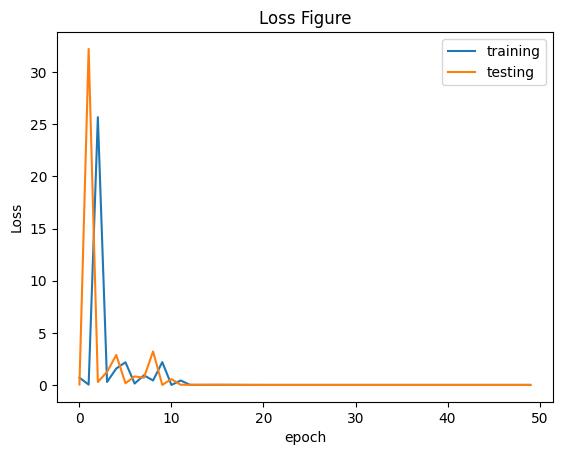

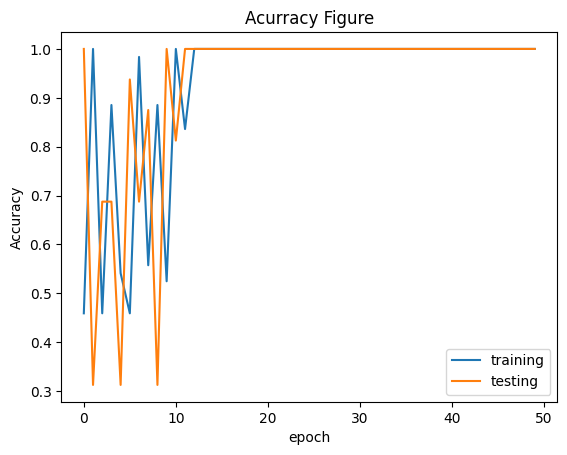

Test Score: 5.418601389806099e-08
Test Accuracy: 1.0


In [9]:
plt.figure(1)
plt.plot(system.history['loss'])
plt.plot(system.history['val_loss'])
plt.legend(['training','testing'])
plt.title('Loss Figure')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.figure(2)
plt.plot(system.history['accuracy'])
plt.plot(system.history['val_accuracy'])
plt.legend(['training','testing'])
plt.title('Acurracy Figure')
plt.xlabel('epoch')
plt.ylabel('Accuracy')

plt.show()
score =model.evaluate(x_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

TEST WITH TESTING DATA

2/2 [==============================] - 0s 24ms/step - loss: 5.4186e-08 - accuracy: 1.0000
Loss rate:  5.418601389806099e-08
Testing accuracy rate:  1.0
1/1 [==============================] - 0s 383ms/step
Expectation [0]
Answer 0
1/1 [==============================] - 0s 66ms/step
Expectation [1]
Answer 1
1/1 [==============================] - 0s 63ms/step
Expectation [1]
Answer 1
1/1 [==============================] - 0s 64ms/step
Expectation [0]
Answer 0
1/1 [==============================] - 0s 66ms/step
Expectation [0]
Answer 0
1/1 [==============================] - 0s 65ms/step
Expectation [0]
Answer 0
1/1 [==============================] - 0s 57ms/step
Expectation [1]
Answer 1
1/1 [==============================] - 0s 56ms/step
Expectation [1]
Answer 1
1/1 [==============================] - 0s 63ms/step
Expectation [0]
Answer 0
1/1 [==============================] - 0s 69ms/step
Expectation [1]
Answer 1


<function matplotlib.pyplot.show(close=None, block=None)>

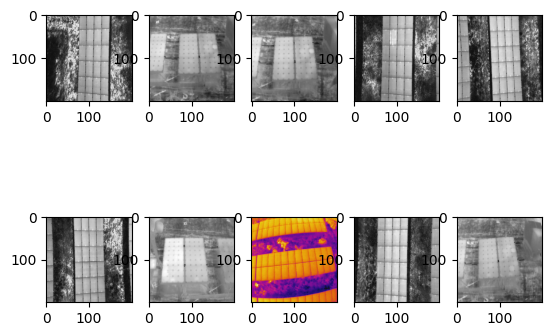

In [10]:
model_loss, model_acc = model.evaluate(x_test, y_test)
print('Loss rate: ', model_loss)
print('Testing accuracy rate: ', model_acc)

for i in range(0,10):
  img1=x2[i]
  plt.subplot(2,5,i+1) 
  plt.imshow(x_test[i])
  img1=np.array(img1)
  img1 = img1.reshape(1, 200, 200, 3)
  img1=img1/255
  print('Expectation', np.argmax(model.predict(img1),axis=-1))
  print('Answer', y2[i])
plt.show

PREDICT

In [11]:
import numpy as np
from keras.utils import load_img, img_to_array
#Tải ảnh
filename = "../RE_Test_Image/test_1.jpg"
img = load_img(filename,target_size=(200,200))
plt.imshow(img)
#chuyển ảnh thành mảng
img = img_to_array(img)
#Định dạng thành mẫu dữ liệu với 3 kênh
img = img.reshape(1,200,200,3)
# Chuẩn bị dữ liệu dạng pixel
img = img.astype('float32')
img = img/255.0
np.argmax(model.predict(img),axis=1)

FileNotFoundError: [Errno 2] No such file or directory: '../RE_Test_Image/test_1.jpg'